# Forage Accenture Data Analysis
We will be anlysing Social Buzz's app performance based on their record of reactions and posts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
content=pd.read_csv('Content.csv')
reaction=pd.read_csv('Reactions.csv')
reaction_type=pd.read_csv('ReactionTypes.csv')

## Data Cleaning
- removing rows that have values which are missing,
- changing the data type of some values within a column, and
- removing columns which are not relevant to this task.
  - Think about how each column might be relevant to the business question you’re investigating. If you can’t think of why a column may be useful, it may not be worth including it
### Content

In [3]:
content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [4]:
# Dropping missing values
content.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

There is almost 20% (199 of 1000 rows) of missing values in the URL, this would become an evaluation to the company on how it collects data as a missing URL would be hard to be imputed. By removing some rows with missing URL, we would be prone to having some type or category of content being lost. Although this would be the case, it is best to remove the rows as it would be useless for a missing post to be represented in an analysis.

In [5]:
content = content.dropna()

In [6]:
# Dropping irrelevant columns
content = content.drop(['Unnamed: 0','URL','User ID'], axis=1)
content

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
994,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [7]:
content.nunique()

Content ID    801
Type            4
Category       17
dtype: int64

### Reaction

In [8]:
reaction

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [9]:
# Dropping rows with missing values
reaction.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [10]:
reaction = reaction.dropna()

In [11]:
# Dropping Columns
reaction = reaction.drop(['Unnamed: 0'], axis=1)
reaction

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...
25547,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


### Reaction Types

In [12]:
reaction_type

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


There seem to be no need to modify the reaction types data except for dropping the unnamed

In [13]:
# Dropping Columns
reaction_type = reaction_type.drop(['Unnamed: 0'], axis=1)

## Merging the Data

In [14]:
# Merging reaction with content
merged_df = reaction.merge(content, how = 'inner', on = ['Content ID'])
merged_df

,Content ID,User ID,Type_x,Datetime,Type_y,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...,...
18379,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,audio,technology
18380,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,audio,technology
18381,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,audio,technology
18382,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,audio,technology


We would utilized inner join so that the content that do not have any type or category mentioned due to it being deleted from the previous process would not get a NaN value as suppose if we used a left join on the reaction dataset

In [15]:
merged_df = merged_df.rename(columns = {'Type_x':'Type', 'Type_y':'Content Type'})

In [16]:
final_merged_df = merged_df.merge(reaction_type, how = 'inner', on = ['Type'])
final_merged_df 

,Content ID,User ID,Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...,...
18379,435007a5-6261-4d8b-b0a4-55fdc189754b,d51a3403-8bab-4d88-af4f-a429c6d8c168,adore,2020-10-04 22:26:33,audio,veganism,positive,72
18380,435007a5-6261-4d8b-b0a4-55fdc189754b,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
18381,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,89572273-761e-46f3-8b99-1689d98aac90,adore,2020-10-31 03:58:44,GIF,culture,positive,72
18382,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,7bf3ce80-784e-42a0-b06a-dbbd1e31a9b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [17]:
# # Exporting the cleaned dataset
# final_merged_df.to_csv('cleaned_dataset.csv', index=False)

## FindingTop 5 Categories

In [18]:
result = final_merged_df.groupby('Category')['Score'].sum().reset_index()
sorted_result = result.sort_values(by='Score', ascending=False)
sorted_result

,Category,Score
15,travel,53935
10,science,53657
8,healthy eating,52745
1,animals,52443
2,cooking,49681
3,culture,47710
7,food,47576
13,technology,46683
5,education,45103
14,tennis,43612


In [19]:
sorted_result[0:5]

,Category,Score
15,travel,53935
10,science,53657
8,healthy eating,52745
1,animals,52443
2,cooking,49681


<AxesSubplot: xlabel='Category', ylabel='Score'>

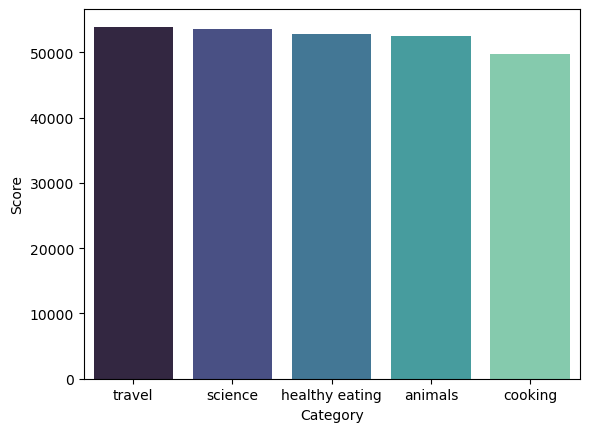

In [20]:
sns.barplot(data = sorted_result[0:5], x = 'Category', y = 'Score', palette = 'mako')

## Further Analysis
- How many unique categories are there?
- How many reactions are there to the most popular category?
- What was the month with the most posts?

In [21]:
final_merged_df['Category'].unique()

array(['Studying', 'healthy eating', 'dogs', 'public speaking', 'tennis',
       'food', 'soccer', 'education', 'studying', 'travel', 'science',
       'veganism', 'cooking', 'technology', 'animals', 'fitness',
       'culture'], dtype=object)

Text(0.5, 1.0, 'Distributions of Reactions on Each Unique Categories')

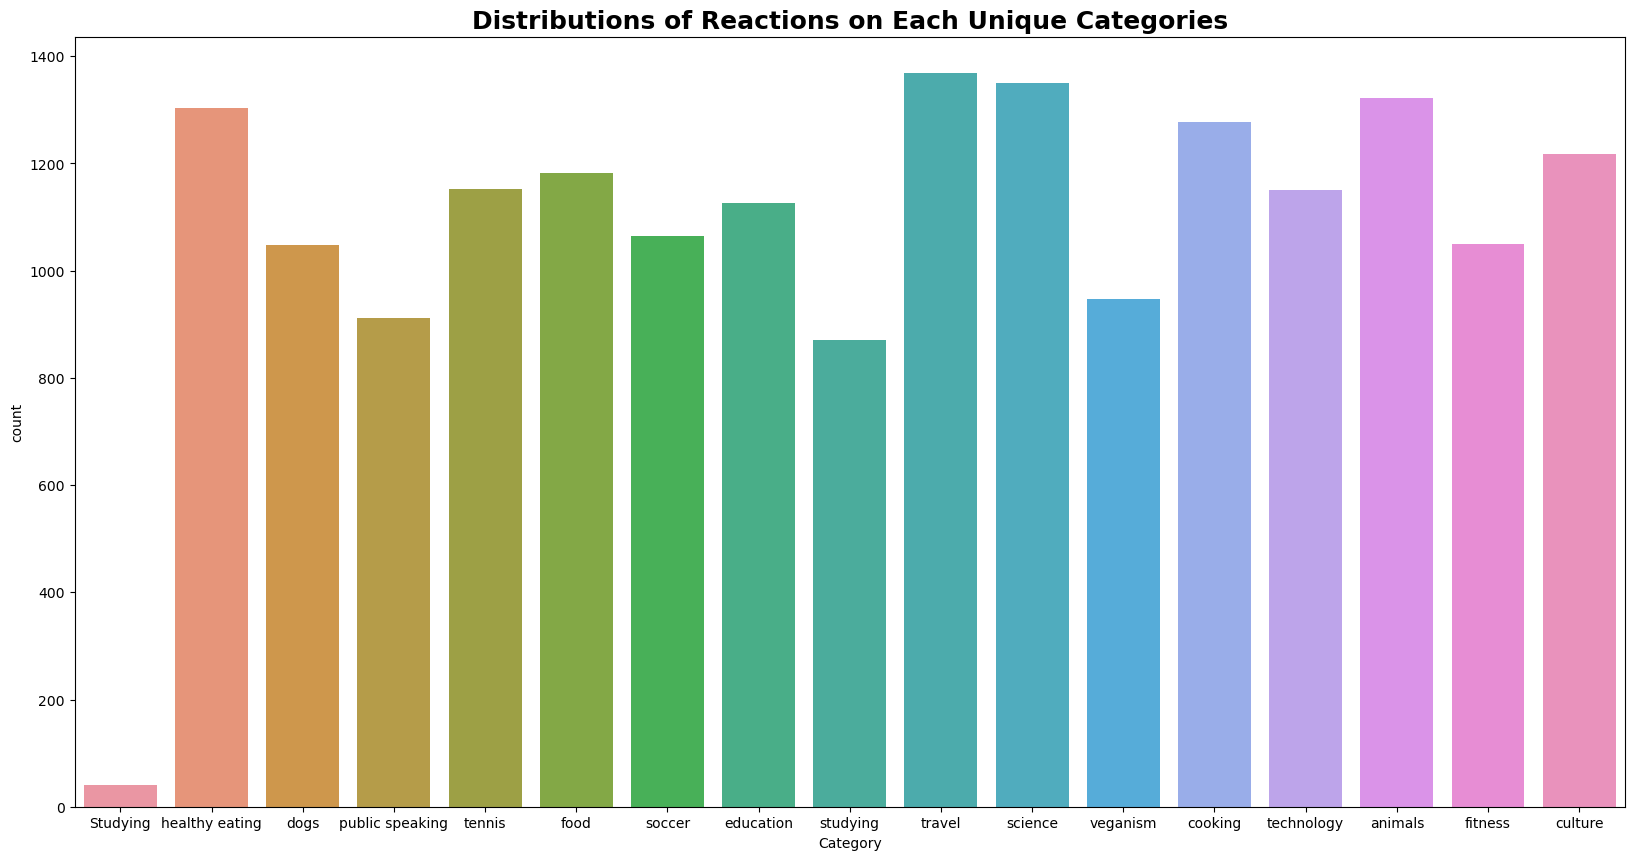

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(final_merged_df, x = 'Category', ax = ax)
ax.set_title('Distributions of Reactions on Each Unique Categories', weight = 'bold', size = 18)

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_72791/3009830583.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top5 = final_merged_df[final_merged_df['Category'].isin(sorted_result['Category'][0:5])]


Text(0.5, 1.0, 'Distributions of Scores on Top 5 Categories')

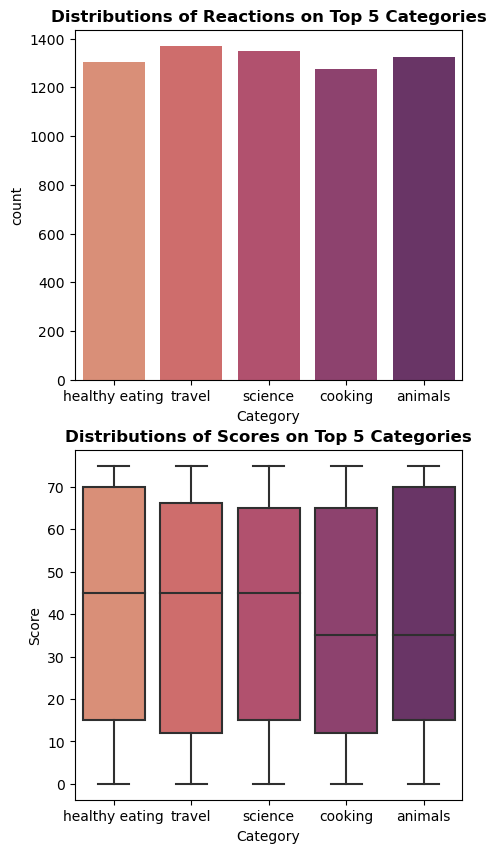

In [23]:
top5 = final_merged_df[final_merged_df['Category'].isin(sorted_result['Category'][0:5])]
fig, ax = plt.subplots(2, figsize = (5,10))

sns.countplot(data=top5, x = 'Category', palette = 'flare', ax = ax[0])
sns.boxplot(data=top5, x = 'Category', y = 'Score', palette = 'flare', ax = ax[1])

ax[0].set_title('Distributions of Reactions on Top 5 Categories', weight = 'bold')
ax[1].set_title('Distributions of Scores on Top 5 Categories', weight = 'bold')

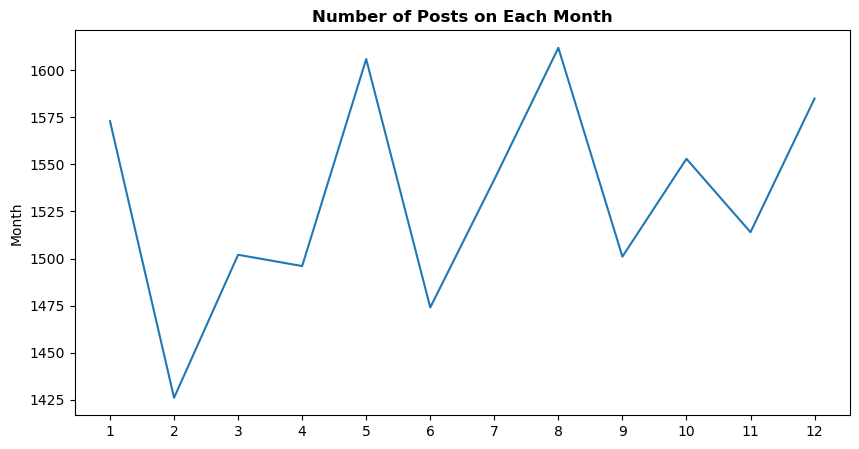

In [24]:
# Getting the months of the data 
final_merged_df['Month'] = pd.DatetimeIndex(final_merged_df['Datetime']).month

# Displaying the month with the most post 
sorted_month = final_merged_df['Month'].value_counts()
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(sorted_month, ax = ax)
ax.set_title('Number of Posts on Each Month', weight = 'bold')
ax.set_xticks(range(1,13))

In [25]:
print("Month with the most post is: " + str(sorted_month.idxmax()))

Month with the most post is: 8


This would conclude the work on analysing Social Buzz's performance over the given dataset

© Louis Widi Anandaputra - 2023